# Tarefa 4 - Limpeza e Transformação

## Importando os dados

In [1]:
import pandas as pd
from IPython.display import clear_output
from concat_df import concat_df

df = concat_df()
df.head()

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year
0,2753519,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,411,2009
1,2753520,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,429,2009
2,2753521,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,109,2009
3,2753522,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,68,2009
4,2753523,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2.418000e+12,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009


## Transformação de Dados

### Tranformação de Tipos

#### receipt_social_security_number

In [2]:
df = df.astype({"receipt_social_security_number": str})

df.head()

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year
0,2753519,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,411,2009
1,2753520,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,429,2009
2,2753521,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,109,2009
3,2753522,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,68,2009
4,2753523,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2418000000131.0,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009


Como originalmente os dados dessa coluna estavam como um ponto flutuante, acaba que os últimos caracteres sejam **'.0'**, mas vejamos se é em todos os casos:

In [3]:
df['l'] = df['receipt_social_security_number'].apply(lambda x : x.endswith('0'))

df[df['l'] == False]

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,l
34,2753553,0,2009-06-07 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,225,2009,False
35,2753554,0,2009-07-01 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,984,2009,False
36,2753555,0,2009-07-21 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,1889,2009,False
37,2753556,0,2009-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,919,2009,False
38,2753557,0,2009-07-26 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,89,2009,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251673,2050518,0,2017-05-25 11:14:52,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,20,2017,False
251674,2050519,0,2017-05-25 11:14:06,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,174,2017,False
251675,2050520,0,2017-05-29 11:53:33,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,1140,2017,False
251676,2050521,0,2017-07-06 10:57:31,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,15,2017,False


Como se vê acima, aparenta que os casos em que o número não termina com **.0** se deve ao fato do valor da coluna ser **nan**

In [4]:
df[(df['l'] == False) & (df['receipt_social_security_number'] != 'nan')]

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,l


O que se percebe é que aqueles que não terminam com '.0' é pelo fato de serem nan antes da conversão.

In [5]:
df['receipt_social_security_number'] = df['receipt_social_security_number'].apply(lambda x : x[:-2] if x != 'nan' else x)

df['receipt_social_security_number']

0         4206050005140
1         4206050005140
2         4206050005140
3         4206050005140
4         2418000000131
              ...      
251877    2012862000160
251878    2012862000160
251879    2012862000160
251880    2012862000160
251881    2012862000160
Name: receipt_social_security_number, Length: 3014902, dtype: object

A impressão que dá é que o CNPJ ou CPF desta coluna estão com menos dígitos que o original, um CNPJ possui [14 dígitos](https://weel.com.br/blog/o-que-e-cnpj) e um CPF [11 dígitos](http://www.dbins.com.br/dica/como-funciona-a-logica-da-validacao-do-cpf).

Uma hipótese para isto é que CNPJs do tipo **0X.XXX.XXX/XXXX-XX**, ao serem convertidos para um número de ponto flutuante acabam tendo seus 0 à esquerda ignorados.

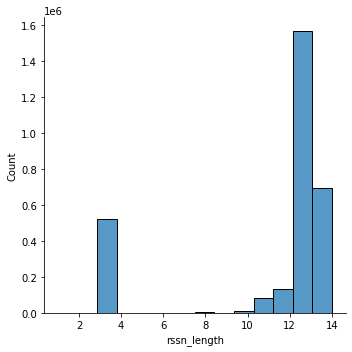

In [6]:
import seaborn as sns

df['rssn_length'] = df['receipt_social_security_number'].apply(lambda x : len(x))

sns.displot(df, x=df['rssn_length'], bins=14)

O histograma mostra que de fato uma parte dos dados possuiam 0s à esquerda quando foram convertidos perderam parte do seu comprimento, logo, ignorando os **nan**, temos uma parte dos dados com muitos dígitos faltando, um problema são os que possuem tamanha entre 8 e 11, pois podem ser, a priori, tanto CPF quanto CNPJ, sendo necessária uma verificação adicional nestes casos. Aqueles com tamanho 12 e 13, constituem CNPJs, e portanto podem ser convertidos.

In [7]:
concat_dict = {12: '00', 13: '0'}

df['receipt_social_security_number'] = df['receipt_social_security_number'].apply(lambda x : (concat_dict[len(x)] + x) if len(x) in concat_dict else x)

As colunas criadas para o tratamento de **receipt_social_security_number** não possuem relevância para outras tarefas, logo serão apagadas.

In [8]:
df.drop(columns=['rssn_length', 'l'], inplace=True)

#### receipt_date

In [9]:
df['receipt_date'] = pd.to_datetime(df['receipt_date'])

df['month'] = df['receipt_date'].dt.month
df['day_of_week'] = df['receipt_date'].dt.dayofweek

df.head(5)

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
0,2753519,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,04206050005140,Maintenance of Office,TIM CELULAR S/A,411,2009,5,1
1,2753520,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,04206050005140,Maintenance of Office,TIM CELULAR S/A,429,2009,5,1
2,2753521,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,04206050005140,Maintenance of Office,TIM CELULAR S/A,109,2009,5,1
3,2753522,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,04206050005140,Maintenance of Office,TIM CELULAR S/A,68,2009,5,1
4,2753523,0,2009-09-25,1772,PSB,SP,Abelardo Camarinha,02418000000131,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009,9,4


### Redimensionamento

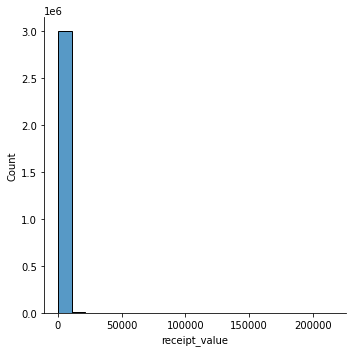

In [10]:
import seaborn as sns

sns.displot(df, x="receipt_value", bins=20)

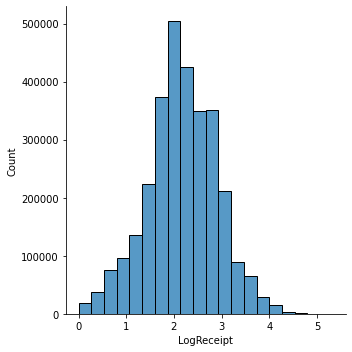

In [11]:
import numpy as np

df_receipt = df[df["receipt_value"] > 0].copy()
df_receipt["LogReceipt"] = np.log10(df_receipt["receipt_value"])
sns.displot(df_receipt, x="LogReceipt", bins=20)

In [12]:
df_receipt.sort_values("receipt_value", ascending=False).head(5)

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week,LogReceipt
34449,1479100,0,2012-12-14,292,PTB,SP,Arnaldo Faria De Sá,05511195000158,Dissemination of the Parliamentary Activity.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,215000,2012,12,4,5.332438
30802,390710,0,2014-12-19,292,PTB,SP,Arnaldo Faria De Sá,54450705000130,Dissemination of the Parliamentary Activity.,GRÁFICA TRÊS PONTAS,208320,2014,12,4,5.318731
34364,34364,0,2013-12-27,292,PTB,SP,Arnaldo Faria De Sá,05511195000158,Dissemination of the Parliamentary Activity.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,197370,2013,12,4,5.295281
36334,724095,0,2011-12-19,292,PTB,SP,Arnaldo Faria De Sá,05511195000158,Dissemination of the Parliamentary Activity.,BALCOLOR,197000,2011,12,0,5.294466
35989,723750,0,2011-12-26,974,PT,SP,Arlindo Chinaglia,09023310000104,Dissemination of the Parliamentary Activity.,ALL WIN PROPAGANDA LTDA,194100,2011,12,0,5.288026


**Quais colunas precisaram de transformação? Que métodos foram utilizados nas colunas?**

As colunas que precisaram de transformação foram: **receipt_social_security_number,receipt_date e receipt_value**. 

Em **receipt_social_security_number** que era um atributo do tipo float foi transformado para o tipo string. Ou seja, aconteceu uma transformação de um tipo de dado. Além disso, houve um tratamento parcial para dados ausentes, um problema porém, é o que fazer para alguns dados, para determinar se estes constituem um CPF ou CNPJ.

Já com o **receipt_date**, este foi transformado para o tipo datetime pois estava como object, com isso, foi possível com isso extrair o mês e o dia da semana no qual o recibo foi emitido.  

Por fim, o **receipt_value** possuia muitos valores pequenos valores concatenados em uma pequena proporção de intervalo de valores. Então, foi realizado um redimensionamento para reduzir essa diferenção desproporcional e para realizar uma melhor  análise dos valores. 


## Limpeza de Dados

### Dados Faltantes

In [13]:
df.isnull().sum()

Unnamed: 0                        0
bugged_date                       0
receipt_date                      0
deputy_id                         0
political_party                   0
state_code                        0
deputy_name                       0
receipt_social_security_number    0
receipt_description               0
establishment_name                0
receipt_value                     0
year                              0
month                             0
day_of_week                       0
dtype: int64

Pela saída do método **isnull** temos que nenhum dado está faltando, mas isso é um engano, pois como visto antes, os dados em **receipt_social_security_number** que eram nan foram convertidos para a string "nan", de forma similar, vimos durante o notebook de visualização de dados que existe um estado chamado "Vazio" em **state_code**, que provavelmente serve para denotar quando não se tem a informação do estado do tal parlamentar. Vejamos mais sobre o caso de **state_code**:

In [14]:
df[df['state_code'] == 'Vazio']

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
25412,2778931,0,2009-07-25,1543,SEM PARTIDO ASSOCIADO,Vazio,Athos Avelino,07575651000159,Airline tickets,Cia Aérea - GOL,334,2009,7,5
83815,2837334,0,2009-07-07,1757,SEM PARTIDO ASSOCIADO,Vazio,Fernando Estima,07575651000159,Airline tickets,Cia Aérea - GOL,539,2009,7,1
117164,2870683,0,2009-10-15,1673,SEM PARTIDO ASSOCIADO,Vazio,João Fontes,07575651000159,Airline tickets,Cia Aérea - GOL,149,2009,10,3
154597,2908116,0,2009-08-14,681,SEM PARTIDO ASSOCIADO,Vazio,Luiz Moreira,07575651000159,Airline tickets,Cia Aérea - GOL,398,2009,8,4
154598,2908117,0,2009-08-14,681,SEM PARTIDO ASSOCIADO,Vazio,Luiz Moreira,07575651000159,Airline tickets,Cia Aérea - GOL,678,2009,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219116,2017961,0,2017-09-14,2864,SEM PARTIDO ASSOCIADO,Vazio,Sdd,23517924000165,Food and Meals,WASHINGTON KLAY CARDOSO,1850,2017,9,3
219117,2017962,0,2017-09-14,2864,SEM PARTIDO ASSOCIADO,Vazio,Sdd,23517924000165,Food and Meals,WASHINGTON KLAY CARDOSO,2000,2017,9,3
219118,2017963,0,2017-09-14,2864,SEM PARTIDO ASSOCIADO,Vazio,Sdd,23517924000165,Food and Meals,WASHINGTON KLAY CARDOSO,1600,2017,9,3
219119,2017964,0,2017-04-05,2864,SEM PARTIDO ASSOCIADO,Vazio,Sdd,31708000100,"Taxi Service, Toll & Parking",SINPETAXI,50,2017,4,2


Percebe-se que a coluna **political_party** também possui uma *label* para identificar a ausência de partido, contudo, o que chama a atenção é que em **deputy_name**, estão sendo utilizadas siglas, provavelmente sendo do gabinete de um partido ou algo similar. Vejamos quais são os nomes de deputados que estão associados à linhas onde o **state_code** e **political_party** assumem valores "nulos".

In [15]:
df[(df['state_code'] == 'Vazio') & (df['political_party'] == 'SEM PARTIDO ASSOCIADO')]['deputy_name'].unique()

array(['Athos Avelino', 'Fernando Estima', 'João Fontes', 'Luiz Moreira',
       'Professor Luizinho', 'Liderança Do Psdb', 'Liderança Do Pt',
       'Pdt', 'Pros', 'Sdd', 'Lid.Gov-Cd', 'Phs', 'Psol', 'Ptn',
       'Lid.Gov-Cn', 'Pode'], dtype=object)

Percebe-se que há o caso de deputados de verdade que possuem seu estado e partido ausentes, mas também, de partidos e bancadas, como é o caso de, por exemplo, Ptn. Deixaremos esses dados separados dos demais.

In [16]:
deputy_names_to_drop = ['Sdd', 'Pdt', 'Pros', 'Phs', 'Psol', 'Ptn', 'Pode', 'Liderança Do Psdb', 'Liderança Do Pt', 'Lid.Gov-Cd', 'Lid.Gov-Cn']

A função **get_na** vai nos dizer a verdadeira quantidade de dados ausentes nas colunas mencionadas anteriormente.

In [17]:
def get_na(df):
    na_deputy_name = len(df[df['deputy_name'].isin(deputy_names_to_drop)])
    na_state_code = len(df[df['state_code'] == 'Vazio'])
    na_political_party = len(df[df['political_party'] == 'SEM PARTIDO ASSOCIADO'])
    na_ssn = len(df[df['receipt_social_security_number'] == 'nan'])
    print('Dados faltantes\ndeputy_name: %d\nstate_code: %d\npolitical_party: %d\nreceipt_social_security_number: %d' % 
          (na_deputy_name, na_state_code, na_political_party, na_ssn))
    
get_na(df)

Dados faltantes
deputy_name: 3556
state_code: 3563
political_party: 3563
receipt_social_security_number: 520952


Agora vamos separar os dados dos partidos/bancadas e dos deputados:

In [18]:
df_parties = df[df['deputy_name'].isin(deputy_names_to_drop)]

df = df[(~df['deputy_name'].isin(deputy_names_to_drop)) | (df['state_code'] != 'Vazio') | (df['political_party'] != 'SEM PARTIDO ASSOCIADO')]

get_na(df)
print('\n')
get_na(df_parties)

Dados faltantes
deputy_name: 0
state_code: 7
political_party: 7
receipt_social_security_number: 520952


Dados faltantes
deputy_name: 3556
state_code: 3556
political_party: 3556
receipt_social_security_number: 0


In [19]:
print(len(df_parties))

3556


Percebe-se que todas as linhas de **df_parties** não possuem valores para **state_code** e **political_party**, mas é de se esperar, uma vez que um partido não tem estado ~ou não~, e o partido está incluso no nome. Uma ressalva é que apesar da função acusar a falta de dados em deputy_name, isso ocorre para ela assumir como ausência de dados nessa coluna quando o nome é de um partido.

Em relação aos deputados vejamos os casos.

In [20]:
df[(df['state_code'] == 'Vazio') | (df['political_party'] == 'Vazio')]

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
25412,2778931,0,2009-07-25 00:00:00,1543,SEM PARTIDO ASSOCIADO,Vazio,Athos Avelino,07575651000159,Airline tickets,Cia Aérea - GOL,334,2009,7,5
83815,2837334,0,2009-07-07 00:00:00,1757,SEM PARTIDO ASSOCIADO,Vazio,Fernando Estima,07575651000159,Airline tickets,Cia Aérea - GOL,539,2009,7,1
117164,2870683,0,2009-10-15 00:00:00,1673,SEM PARTIDO ASSOCIADO,Vazio,João Fontes,07575651000159,Airline tickets,Cia Aérea - GOL,149,2009,10,3
154597,2908116,0,2009-08-14 00:00:00,681,SEM PARTIDO ASSOCIADO,Vazio,Luiz Moreira,07575651000159,Airline tickets,Cia Aérea - GOL,398,2009,8,4
154598,2908117,0,2009-08-14 00:00:00,681,SEM PARTIDO ASSOCIADO,Vazio,Luiz Moreira,07575651000159,Airline tickets,Cia Aérea - GOL,678,2009,8,4
209868,2963387,0,2009-10-18 01:00:00,1410,SEM PARTIDO ASSOCIADO,Vazio,Professor Luizinho,07575651000159,Airline tickets,Cia Aérea - GOL,1105,2009,10,6
209869,2963388,0,2009-10-22 00:00:00,1410,SEM PARTIDO ASSOCIADO,Vazio,Professor Luizinho,07575651000159,Airline tickets,Cia Aérea - GOL,4,2009,10,3


Os deputados Athos Avelino, Fernando Estima, João Fontes, Luiz Moreira, e Professor Luizinho, possuem dados de estado e partido faltantes. Por meio de uma pesquisa no site da câmara, foi possível preencher manualmente os dados faltantes.

In [21]:
fill_dict = {'Athos Avelino': ['PPS', 'MG'],
             'Fernando Estima': ['PL', 'SP'],
             'João Fontes': ['PT', 'SE'],
             'Luiz Moreira': ['PFL', 'BA'],
             'Professor Luizinho': ['PT', 'SP']
}

for (key, val) in fill_dict.items():
    df.loc[df['deputy_name'] == key, 'political_party'] = val[0]
    df.loc[df['deputy_name'] == key, 'state_code'] = val[1]

get_na(df)

Dados faltantes
deputy_name: 0
state_code: 0
political_party: 0
receipt_social_security_number: 520952


Como vimos, após uma análise mais cuidadosa dos dados, não foram encontradas colunas com valores **nan** ou **none**, porém notamos que as colunas **political_party** e **state_code** possuem valores "SEM PARTIDO ASSOCIADO" e "Vazio", enquanto que a coluna **deputy_name** em algumas instâncias se encontram com nomes de partidos, o que não é interessante para a análise que foi proposta de avaliar os gastos de deputados. Esse cojunto de valores para uma mesma instância impossibilita a identificação do deputado a qual se refere, portanto foi decidido que não valeria a pena manter essas informações na tabela.

Também foram encontrados valores de string **nan** para a coluna de **receipt_social_security_number**, porém a falta dessa informação não atrapalha na avaliação dos dados, então foi decidido manter tais instâncias.

### Remoção de colunas

A coluna **Unnamed: 0** não parece ter uma informação útil, e portanto será removida.

In [22]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df_parties.drop(columns=['Unnamed: 0'], inplace=True)

### Dados Duplicados

In [23]:
df[df.duplicated(keep=False)]

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
172,0,2009-12-15,1772,PSB,SP,Abelardo Camarinha,07575651000159,Airline tickets,Cia Aérea - GOL,4,2009,12,1
173,0,2009-12-15,1772,PSB,SP,Abelardo Camarinha,07575651000159,Airline tickets,Cia Aérea - GOL,957,2009,12,1
181,0,2009-10-27,1772,PSB,SP,Abelardo Camarinha,07575651000159,Airline tickets,Cia Aérea - GOL,387,2009,10,1
182,0,2009-10-27,1772,PSB,SP,Abelardo Camarinha,07575651000159,Airline tickets,Cia Aérea - GOL,387,2009,10,1
183,0,2009-10-30,1772,PSB,SP,Abelardo Camarinha,07575651000159,Airline tickets,Cia Aérea - GOL,294,2009,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251781,0,2017-02-06,2930,PR,RN,Zenaide Maia,02575829000148,Airline tickets,Cia Aérea - AVIANCA,80,2017,2,0
251782,0,2017-02-13,2930,PR,RN,Zenaide Maia,02575829000148,Airline tickets,Cia Aérea - AVIANCA,80,2017,2,0
251783,0,2017-02-13,2930,PR,RN,Zenaide Maia,02575829000148,Airline tickets,Cia Aérea - AVIANCA,80,2017,2,0
251785,0,2017-03-13,2930,PR,RN,Zenaide Maia,02575829000148,Airline tickets,Cia Aérea - AVIANCA,80,2017,3,0


In [24]:
df_parties[df_parties.duplicated(keep=False)]

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
198918,0,2012-09-13,2442,SEM PARTIDO ASSOCIADO,Vazio,Liderança Do Psdb,02449992000164,Telephony,VIVO,275,2012,9,3
198920,0,2012-09-13,2442,SEM PARTIDO ASSOCIADO,Vazio,Liderança Do Psdb,02449992000164,Telephony,VIVO,275,2012,9,3
198954,0,2012-03-22,2442,SEM PARTIDO ASSOCIADO,Vazio,Liderança Do Psdb,07033375000105,Food and Meals,IRENE R DE MACEDO EPP,50,2012,3,3
198955,0,2012-03-22,2442,SEM PARTIDO ASSOCIADO,Vazio,Liderança Do Psdb,07033375000105,Food and Meals,IRENE R DE MACEDO EPP,50,2012,3,3
198956,0,2012-03-22,2442,SEM PARTIDO ASSOCIADO,Vazio,Liderança Do Psdb,07033375000105,Food and Meals,IRENE R DE MACEDO EPP,50,2012,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191882,0,2017-09-11,2715,SEM PARTIDO ASSOCIADO,Vazio,Pdt,26421230000118,Dissemination of the Parliamentary Activity.,HMP COMUNICAÇÃO LTDA,7300,2017,9,0
195618,0,2017-09-06,3172,SEM PARTIDO ASSOCIADO,Vazio,Pode,03346671000954,Food and Meals,TAIOBA SELF-SERVICE LTDA-EPP,324,2017,9,2
195619,0,2017-09-06,3172,SEM PARTIDO ASSOCIADO,Vazio,Pode,03346671000954,Food and Meals,TAIOBA SELF-SERVICE LTDA-EPP,324,2017,9,2
219113,0,2017-08-08,2864,SEM PARTIDO ASSOCIADO,Vazio,Sdd,23517924000165,Food and Meals,WASHINGTON KLAY CARDOSO,2000,2017,8,1


Percebe-se que ambas as bases de dados possuem dados duplicados que serão removidos, com exceção da primeira ocorrência do dado duplicado.

In [25]:
print('len(df) = %d, len(df_parties) = %d' % (len(df), len(df_parties)))
df.drop_duplicates(keep='first', inplace=True)
df_parties.drop_duplicates(keep='first', inplace=True)
print('len(df) = %d, len(df_parties) = %d' % (len(df), len(df_parties)))

len(df) = 3011346, len(df_parties) = 3556
len(df) = 2842171, len(df_parties) = 3479


Como resultado ambas as bases tiveram uma redução no seu tamanho, em linhas.

## Exportar resultados

Por conta das limitações de tamanho de arquivos do GitHub, os dados de deputados serão separados em arquivos distintos

In [26]:
df_parties.to_csv('data/partidos_tratado.csv')

for year in df['year'].unique(): # Para cada ano na base de dados
    df[df['year'] == year].to_csv('data/' + str(year) + '_tratado.csv') # Salvar todas as entradas daquele ano em um arquivo .csv